### 보스턴 집값 예측
sklearn 패키지의 datasets 서브패키지는 회귀분석을 공부하기 위한 예제를 제공한다. load_boston() 명령으로 받을 수 있는 보스턴 주택 가격 데이터는 다음과 같은 데이터 이다. 보스턴의 506개 타운의 13개의 독립변수값으로 부터 해당 타운의 주택가격 중앙값을 예측하는 문제다. 

독립변수

- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율


종속변수

- 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston) #dir 정의된 모듈 이름을 찾을때 사용

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [7]:
dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [8]:
df = pd.concat([dfx,dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


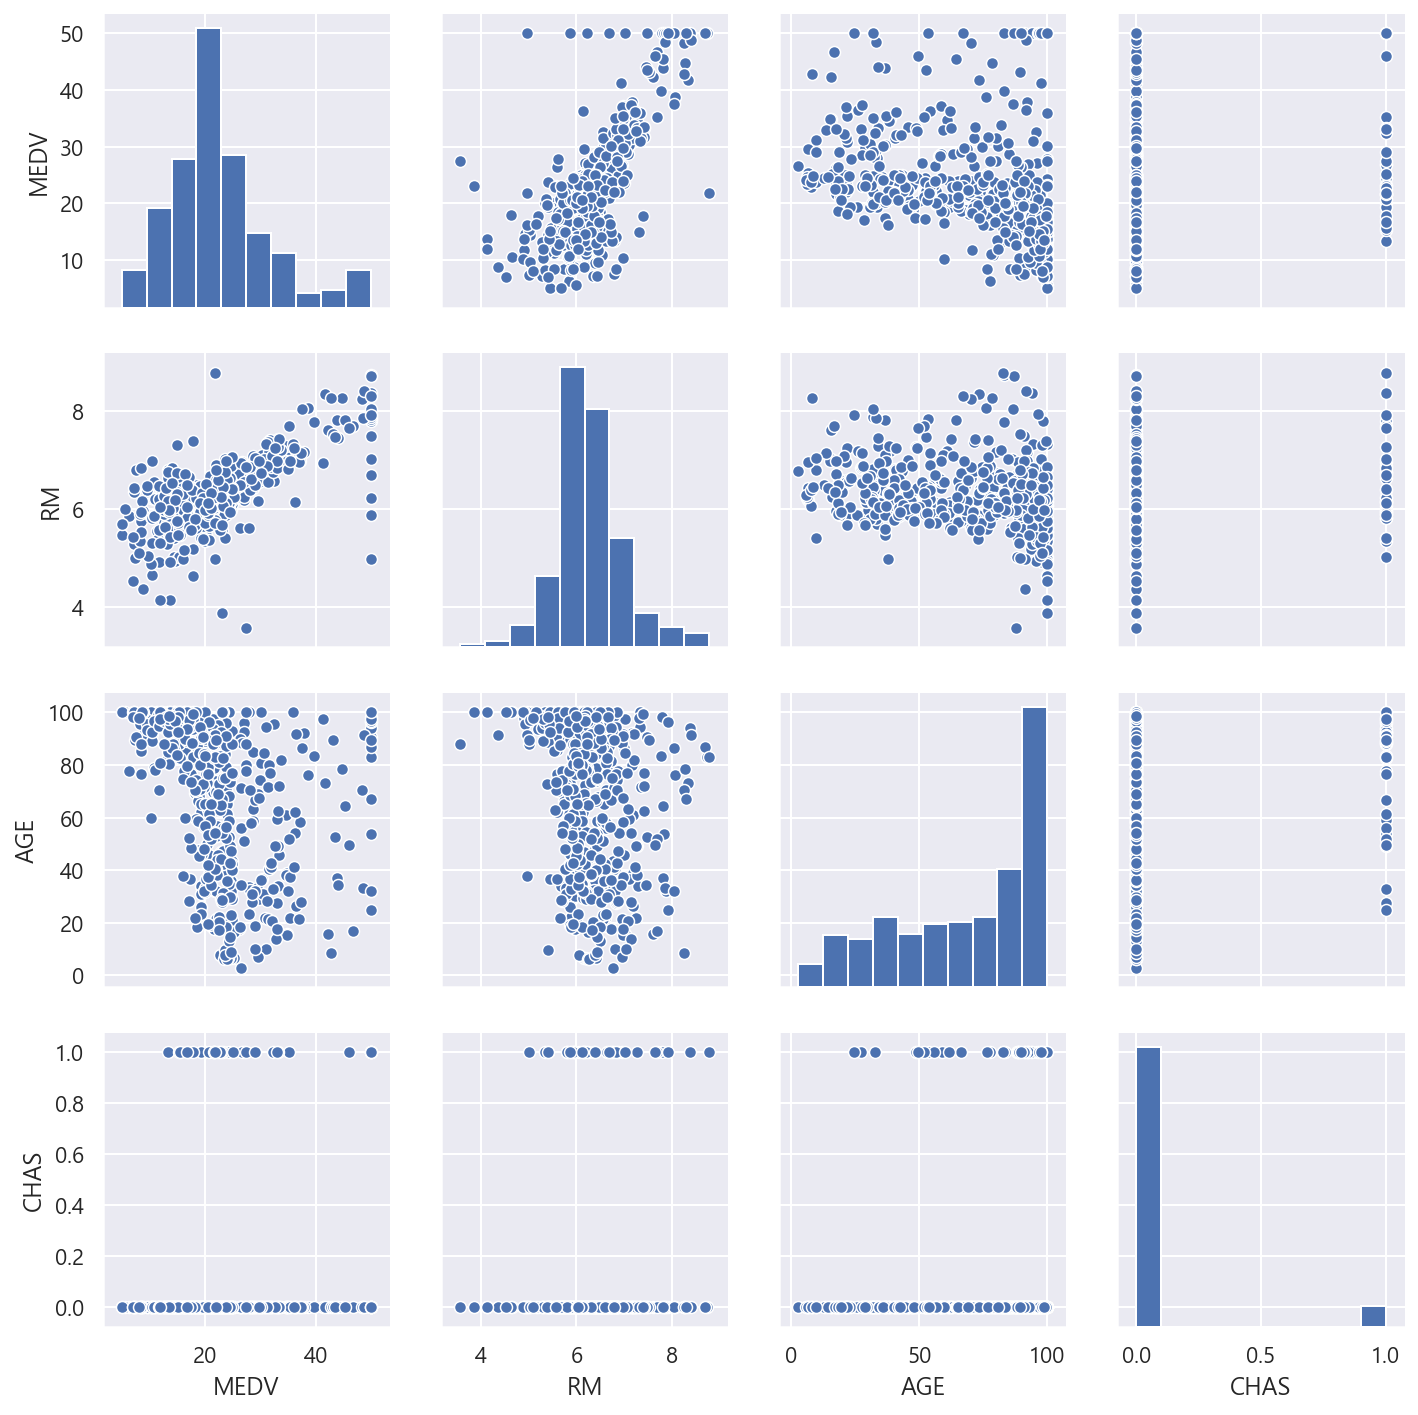

In [9]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

In [11]:
from sklearn.datasets import fetch_california_housing

In [12]:
california = fetch_california_housing()

In [16]:
dir(california)

['DESCR', 'data', 'feature_names', 'target']

In [29]:
dfx = pd.DataFrame(california.data, columns=california.feature_names)
dfy = pd.DataFrame(california.target, columns=["Target"]) 

In [32]:
df = pd.concat([dfx, dfy], axis=1 )
df.tail()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


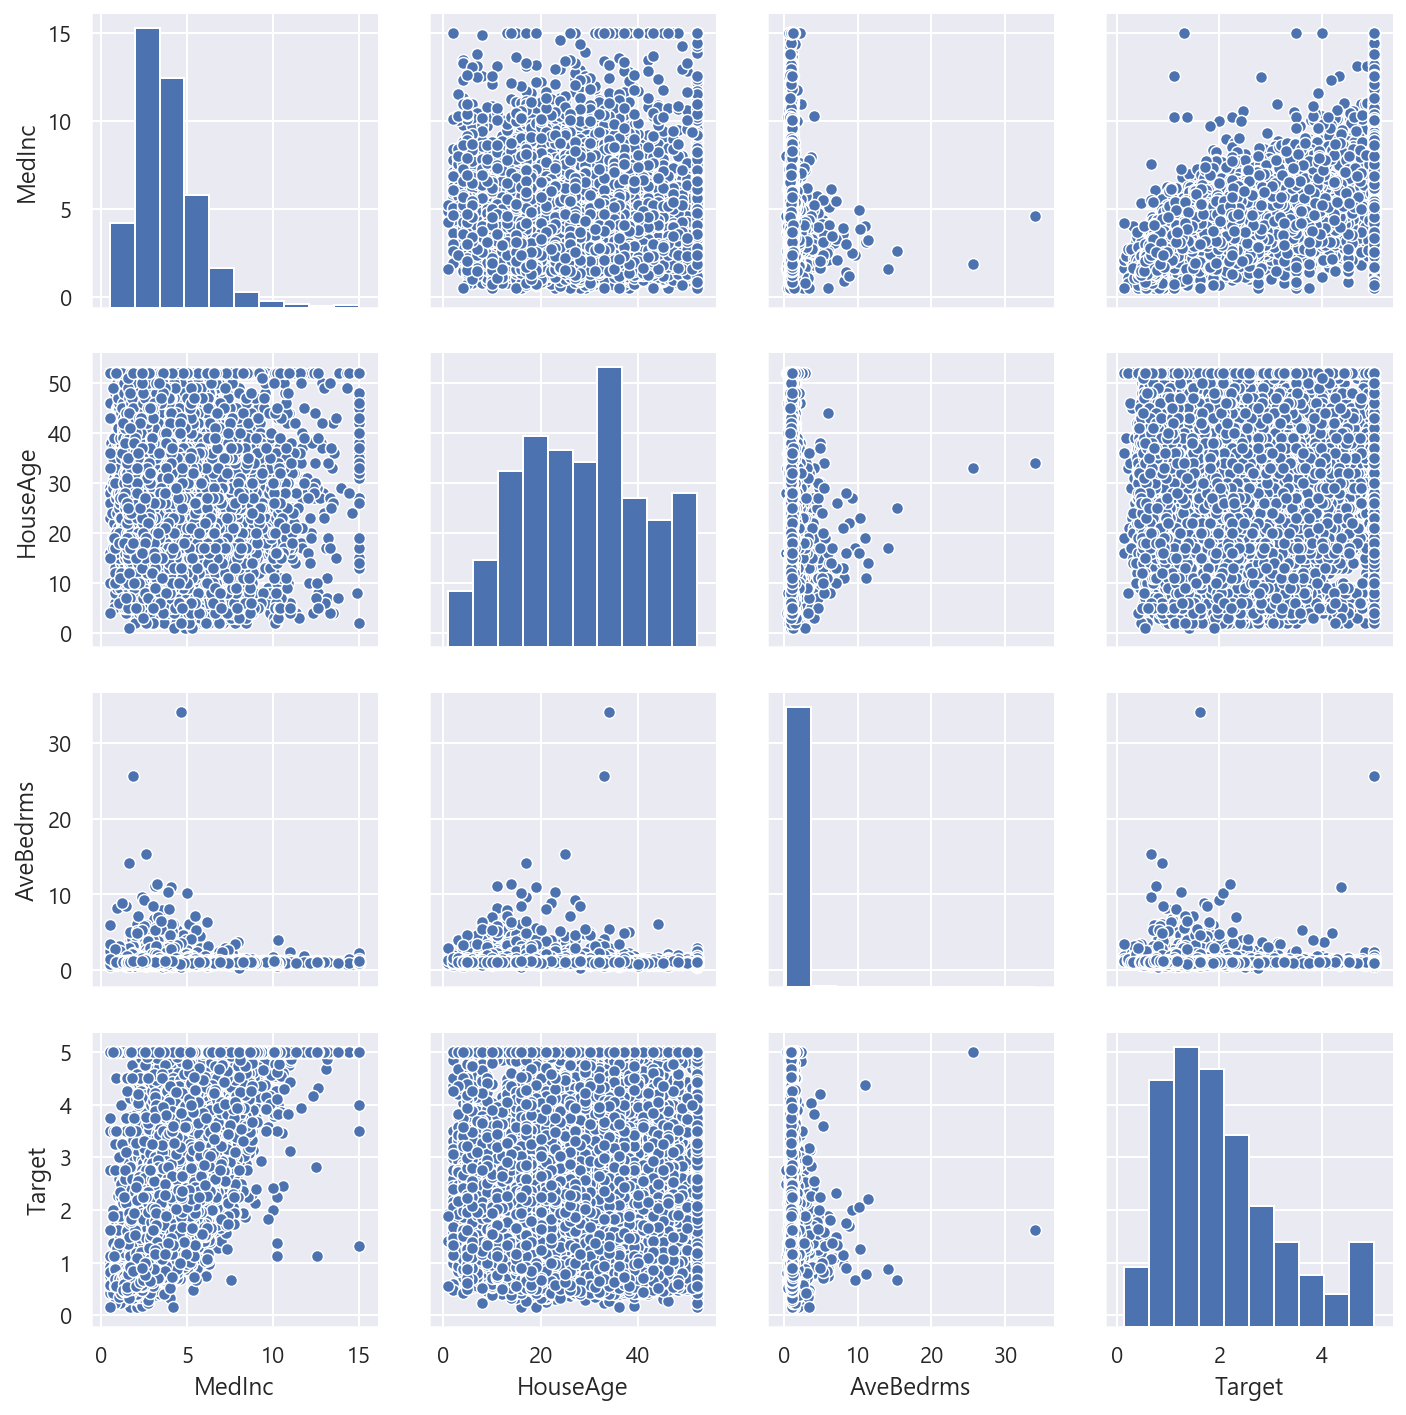

In [35]:
sns.pairplot(df[["MedInc", "HouseAge", "AveBedrms", "Target"]])
plt.show()

### 가상 데이터 예측

scikit-learn 패키지는 가상의 회귀분석 문제를 만들어 주는 make_regression() 명령도 제공한다.


X, y, w = make_regression(n_samples, n_features, bias, noise, random_state, coef=True)

- n_samples : 정수(옵션 디폴트 100) 표본 데이터의 개수
- n_features : 정수(옵션 디폴트 100) 독립변수(feature)의 수 M
- bias : 실수 (옵션 디폴트는 0) y 절편
- noise : 실수 (옵션 디폴트는 0) 출력 즉, 종속변수에 더해지는 잡음의 표준편차
- random state : 난수발생 시트값
- coef : 불리언(옵션 디폴트 False) True이면 선형모형의 계수도 출력


- X : [n_samples, n_features]형상의 2차원 배열
- y : [n_samples]형상의 1차원 배열 종속변수의 표본 데이터 벡터 y
- w : [n_features]형상의 1차원 배열 또는 [n_features, n_targets]형상의 2차원 배열 (선형모형의 계수 벡터w , 입력인수 coef가 True 일때만 출력이 됨)    

make_regression() 명령은 내부적으로 다음 과정을 거쳐 가상의 데이터를 만든다.

- 1. 독립변수 데이터 행렬 x를 무작위로 만든다.
- 2. 종속변수와 독립변수를 연결하는 가중치 벡터 w를 무작위로 만든다.
- 3. x와 w를 내적하고 y절편 b 값을 더하여 독립변수와 완전선형인 종속변수 벡터 y_0를 만든다
- 4. 기대값이 0이고 표준편차가 noise인 정규분포를 이용하여 잡음 epsilon를 만든다.
- 5. 독립변수와 완전선형인 종속변수 벡터 y_0에 잡음 epsilon을 더해서 종속변수 y를 만든다.

In [2]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state =0 
    
)


In [3]:
X

array([[-0.85409574],
       [ 1.49407907],
       [-0.34791215],
       [ 0.44386323],
       [-0.18718385],
       [ 1.86755799],
       [ 0.4105985 ],
       [-1.70627019],
       [-1.42001794],
       [ 0.8644362 ],
       [ 0.97873798],
       [-0.20515826],
       [ 0.15494743],
       [-0.50965218],
       [ 1.53277921],
       [-0.74216502],
       [-1.45436567],
       [-0.10321885],
       [-2.55298982],
       [ 1.76405235],
       [-1.25279536],
       [-0.97727788],
       [ 0.04575852],
       [-0.4380743 ],
       [ 0.76103773],
       [ 0.14404357],
       [-0.21274028],
       [ 1.20237985],
       [-0.38732682],
       [ 2.2408932 ],
       [ 0.77749036],
       [ 0.15634897],
       [-1.61389785],
       [ 1.9507754 ],
       [ 0.40015721],
       [ 1.46935877],
       [ 1.45427351],
       [-0.30230275],
       [ 0.3130677 ],
       [ 0.33367433],
       [ 2.26975462],
       [-0.15135721],
       [ 0.12167502],
       [ 0.37816252],
       [ 0.6536186 ],
       [ 0

In [5]:
w

array(15.89695836)

In [ ]:
def make_regression2(x, n_samples):
    ls = []
    for i in range(50):
        ls.append(np.random.rand())
    for x in ls:
        bias = x+100
        noise = n* random    
        random_state = np.random.seed(0)
        return bias+noise

In [8]:
random.rand

0.8327426703164086

In [40]:
def make_regressin2(n_samples, bias, noise, random_state=0):
    np.random.seed(random_state)
    X = np.random.normal(size=n_samples)
    w  = np.random.normal(size=1)[0]
    y0 = X*w + bias
    e = np.random.normal(scale=noise, size=n_samples)
    y = y0 + e
    return X, y, w

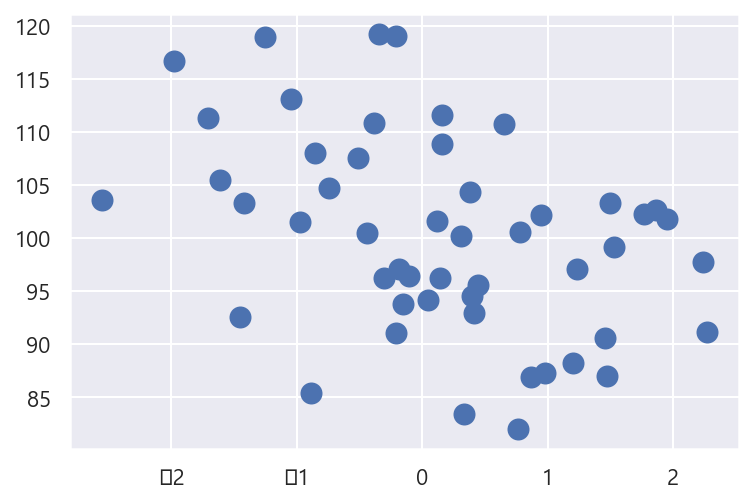

In [54]:
X, y, w= make_regressin2(50, 100,10,0)
plt.scatter(X, y, s=100)
plt.show()

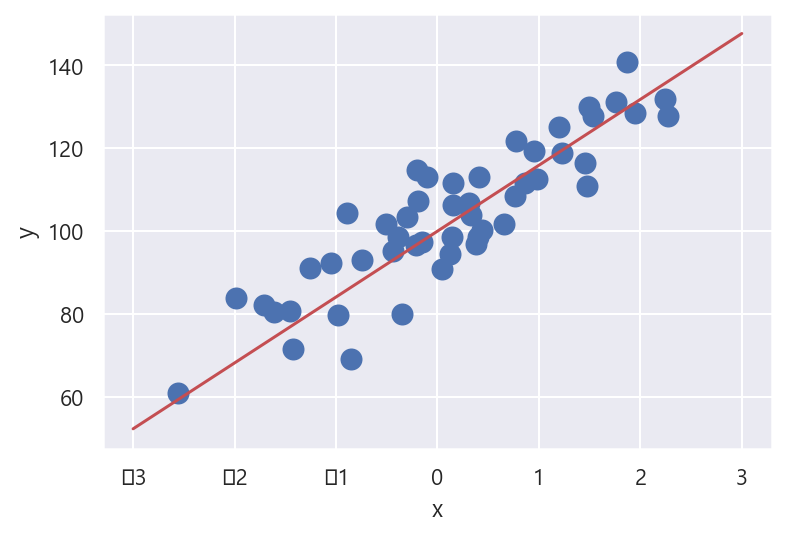

In [43]:
from sklearn.datasets import make_regression
X, y, w = make_regression(n_samples =50, n_features=1,bias=100 ,noise=10, coef=True, random_state=0)

xx = np.linspace(-3, 3, 100)
y0 = w*xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

독립변수가 2개인 표본 데이터를 생성하여 스캐터플롯을 그리면 다음과 같다. 종속변숫값은 점의 명암으로 표시하였다. 점의 밝기가 밝으면 종속변숫값이 큰 것이고 점의 밝기가 어두우면 종속변숫값이 작은것이다. 스캐터플롯에서 x1, x2가 증가할수록 종속변숫값이 커지는 것을 알 수 있다.

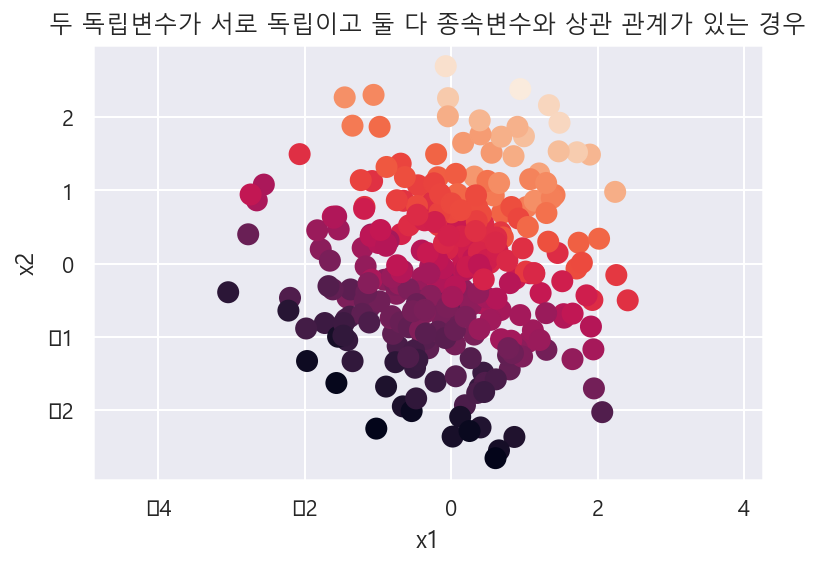

In [53]:
X, y, w = make_regression(
    n_samples=300, n_features=2, noise=10, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관 관계가 있는 경우")
plt.show()


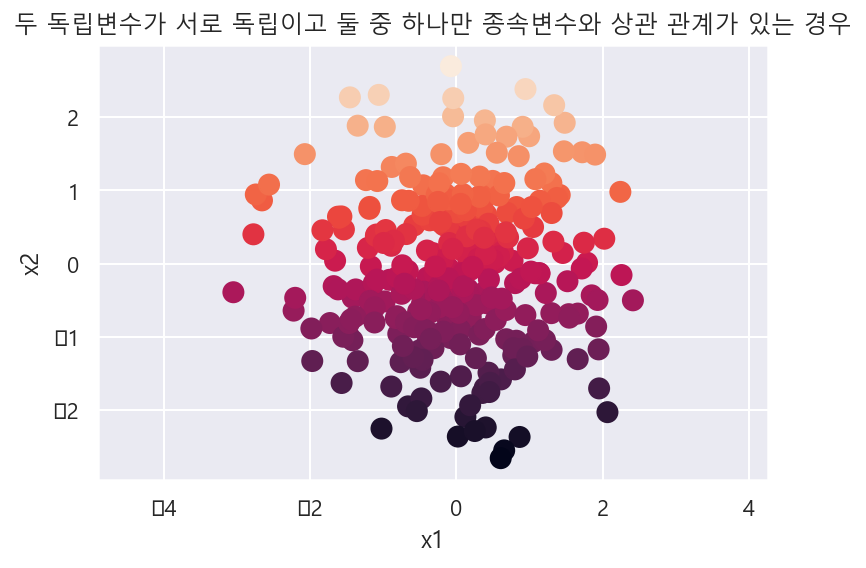

In [46]:
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우")
plt.show()

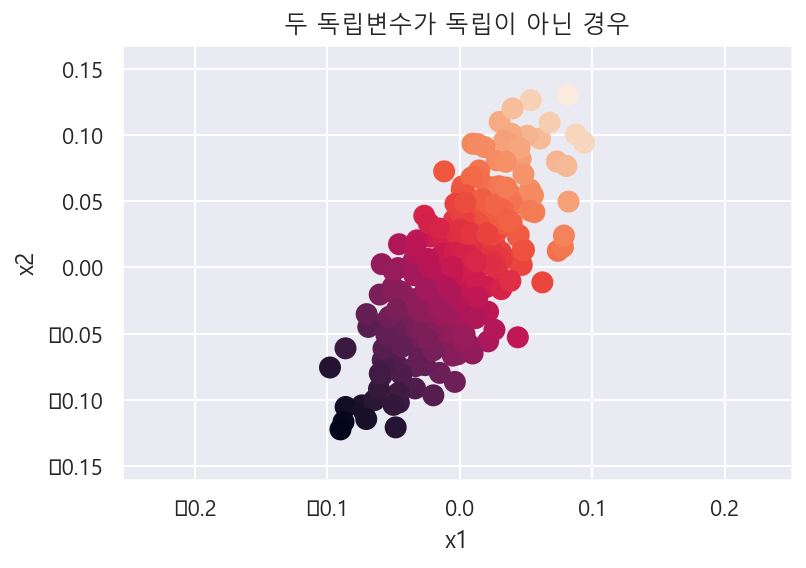

In [55]:
X, y, w = make_regression(
    n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
    tail_strength=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우")
plt.show()

### 선형회귀분석의 기초

- 회귀분석은 독립변수 x에 대응하는 종속변수 y와 가장 비슷한 값 y^를 출력하는 함수를 찾는 과정이다.
만약 f(x)가 선형함수 이면 이함수를 선형회귀모형이라고 한다.


#### 상수항 결합

회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합작업이라고 한다.
statsmodels 패키지는 상수항 결합을 위한 add_constant 함수를 제공한다.

In [57]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [58]:
import statsmodels.api as sm

X  = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

#### 최소자승법
최소자승법은 잔차제곱합을 최소화하는 가중치 벡터를 구하는 방법이다.

### 직교 방정식

- 1. 모형에 상수항이 있는 경우에 잔차 벡터의 원소의 합은 0이다. 즉, 잔차의 평균은 0이다.
- 2. x 데이터의 평균값 에대한 예측값은 y데이터의 평균값이다.

1번 성질은 상수항 결합이 되어 있으면 첫번째 열이 1 벡터라는 것을 이용하여 증명한다.

In [66]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [67]:
w

array(86.44794301)

In [61]:
w = np.linalg.inv(X.T@X)@X.T@y
w

array([[99.79150869],
       [86.96171201]])

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


In [69]:
model.predict([[-2], [-1], [0], [1], [2]])


array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

In [70]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [74]:
dfy = df[["y"]]
dfx = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          8.17e-182
Time:                        16:19:39   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

In [58]:
import statsmodels.api as sm

from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [59]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [60]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [61]:
result

In [63]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          8.17e-182
Time:                        11:52:14   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [64]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [65]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64